In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor

In [2]:
train = pd.read_csv(r'c:\Users\yunis\Downloads\train.csv')
test = pd.read_csv(r'c:\Users\yunis\Downloads\test.csv')

In [5]:
features = train.select_dtypes(include=[np.number]).columns.drop('y')

In [7]:
X_train = train[features].fillna(0)
y_train = train['y']
X_test = test[features].fillna(0)

In [8]:
model = RandomForestRegressor(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [9]:
predictions = model.predict(X_test)

In [10]:
opt_df = pd.DataFrame({
    'index_id': test.index,
    'pred': predictions,
    'existence_index': test['existence expectancy index'].fillna(0)
})

In [11]:
opt_df['potential'] = -np.log(opt_df['pred'] + 0.01) + 3

In [12]:
opt_df['efficiency'] = opt_df['potential'] ** 2 

In [13]:
opt_df['opt_pred'] = 0  # Starting with 0 energy
total_energy = 50000
needy_quota = 5000

In [14]:
opt_df = opt_df.sort_values(by='efficiency', ascending=False)

In [15]:
for i, row in opt_df.iterrows():
    if row['existence_index'] < 0.7 and needy_quota > 0:
        amount = 100 # Give max amount
        opt_df.at[i, 'opt_pred'] = amount
        needy_quota -= amount
        total_energy -= amount

In [ ]:
for i, row in opt_df.iterrows():
    if total_energy <= 0:
        break
    
    if opt_df.at[i, 'opt_pred'] < 100:
        amount = 100 - opt_df.at[i, 'opt_pred'] 
        
        if amount > total_energy:
            amount = total_energy
            
        opt_df.at[i, 'opt_pred'] += amount
        total_energy -= amount

In [17]:
submission = opt_df[['index_id', 'pred', 'opt_pred']].sort_index()
submission.columns = ['index', 'pred', 'opt_pred'] 
submission.to_csv('submission.csv', index=False)

In [19]:
print("Done! Task is ready.")
print(submission.head())

Done! Task is ready.
   index      pred  opt_pred
0      0  0.039793       100
1      1  0.039178       100
2      2  0.039258       100
3      3  0.039327       100
4      4  0.019444       100


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
print("Data Summary:")
display(train.describe())

Data Summary:


,galactic year,existence expectancy index,existence expectancy at birth,Gross income per capita,Income Index,Expected years of education (galactic years),Mean years of education (galactic years),Intergalactic Development Index (IDI),Education Index,"Intergalactic Development Index (IDI), Rank",...,"Intergalactic Development Index (IDI), female","Intergalactic Development Index (IDI), male",Gender Development Index (GDI),"Intergalactic Development Index (IDI), female, Rank","Intergalactic Development Index (IDI), male, Rank",Adjusted net savings,"Creature Immunodeficiency Disease prevalence, adult (% ages 15-49), total",Private galaxy capital flows (% of GGP),Gender Inequality Index (GII),y
count,3.865000e+03,3864.000000,3864.000000,3837.000000,3837.000000,3732.000000,3502.000000,3474.000000,3474.000000,3432.000000,...,916.000000,915.000000,914.000000,893.000000,892.000000,912.000000,941.000000,874.000000,844.000000,3865.000000
mean,1.000709e+06,0.872479,76.798111,31633.240872,0.825154,14.723296,10.283959,0.804246,0.745900,135.129178,...,0.823561,0.844209,1.008465,121.754797,120.873428,21.252922,6.443023,22.261474,0.600733,0.082773
std,6.945463e+03,0.162367,10.461654,18736.378446,0.194055,3.612546,3.319948,0.176242,0.199795,52.449535,...,0.185780,0.159041,0.087299,46.269362,46.795666,14.258986,4.804873,34.342797,0.205785,0.063415
min,9.900250e+05,0.227890,34.244062,-126.906521,0.292001,3.799663,1.928166,0.273684,0.189874,9.925906,...,0.305733,0.369519,0.465177,23.224603,16.215151,-76.741414,-1.192011,-735.186887,0.089092,0.013036
25%,9.950060e+05,0.763027,69.961449,20169.118910,0.677131,12.592467,7.654169,0.671862,0.597746,92.262724,...,0.690707,0.731264,0.965800,84.090816,82.232550,15.001028,4.113472,17.227899,0.430332,0.047889
50%,1.000000e+06,0.907359,78.995101,26600.768190,0.827300,14.942913,10.385465,0.824758,0.761255,135.914318,...,0.835410,0.862773,1.029947,120.069916,121.057923,22.182571,5.309497,24.472557,0.624640,0.057820
75%,1.006009e+06,0.992760,84.558971,36898.631750,0.970295,17.123797,12.884752,0.939043,0.893505,175.301993,...,0.970365,0.961369,1.068481,158.579644,157.815625,29.134738,6.814577,31.748295,0.767404,0.087389
max,1.015056e+06,1.246908,100.210053,151072.683200,1.361883,26.955944,19.057648,1.232814,1.269625,278.786613,...,1.237661,1.182746,1.181230,232.720847,233.915373,61.903641,36.538462,95.941245,1.098439,0.683813


In [22]:
# Check for missing values
print("\nMissing Values:")
print(train.isnull().sum().head(10))


Missing Values:
galactic year                                     0
galaxy                                            0
existence expectancy index                        1
existence expectancy at birth                     1
Gross income per capita                          28
Income Index                                     28
Expected years of education (galactic years)    133
Mean years of education (galactic years)        363
Intergalactic Development Index (IDI)           391
Education Index                                 391
dtype: int64


c:\Users\yunis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


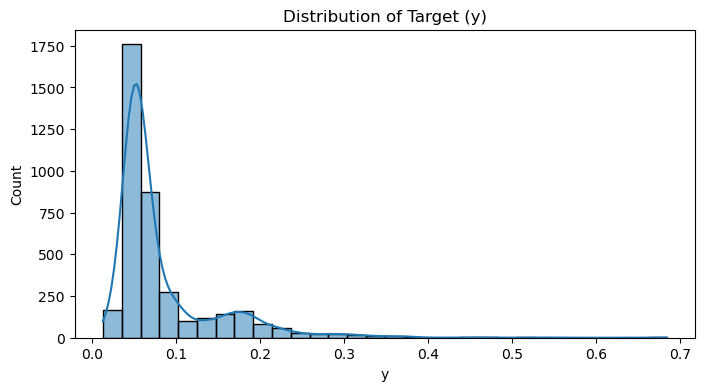

In [23]:
# Visualize for y
plt.figure(figsize=(8, 4))
sns.histplot(train['y'], bins=30, kde=True)
plt.title('Distribution of Target (y)')
plt.show()